In [4]:
import numpy as np
import DeeperDream as dd
from scipy import stats
from itertools import chain
from matplotlib import pyplot as plt

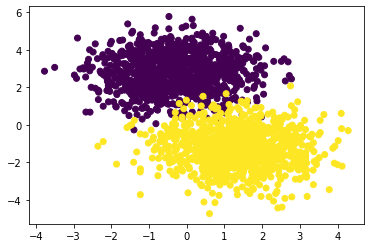

In [5]:
x,y = dd.Toy.Clusters(1000,2,2,4)
plt.scatter(x[:,0],x[:,1],c=np.argmax(y,axis=1))

In [6]:
def mode(x, axis):
    return stats.mode(x,axis=axis)[0]

def dist(x1,x2):
    return np.sqrt(np.sum((x1.reshape(x1.shape[0],1,x1.shape[1]) - x2)**2,axis=2))

class knn:
    def __init__(self, x, y, k, agg_func):
        self.x = x
        self.y = np.argmax(y,axis=1)
        self.k = k
        self.agg_func = agg_func
        
    def Predict(self,x):
        k_nearest = np.argsort(self.dist(x, self.x),axis=1)[:,:self.k]
        
        return self.agg_func(self.y[k_nearest],axis=1)

In [120]:
model = knn(x,y,2,mode)

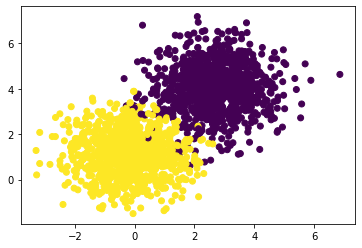

In [122]:
y_hat = model.Predict(x)
plt.scatter(x[:,[0]],x[:,[1]],c=y_hat)

In [1]:
def w_mode(x,axis,weights=None):
    if weights is None:
        weights = np.ones_like(x)
    uniques = np.unique(x)
    modes = np.zeros([x.shape[0], uniques.shape[0]])
    for i,u in enumerate(uniques):
        modes[:,i] += np.sum(weights[range(weights.shape[0]),x==u], axis=1)
        
    return np.argmax(modes, axis=1)

class WeightedKNN:
    def __init__(self, k, agg_func, dist_func=dist, weight_func=None):
        self.k = k
        self.agg_func = agg_func
        self.weight_func = weight_func
        self.dist_func = dist_func
        
    def Fit(self,x,y):
        self.x = x
        self.y = y
            
    def Predict(self,x):
        dists = self.dist_func(x,self.x)
        if self.weight_func is None:
            weights = 1 / (dists + 1e-16)
        else:
            weights = self.weight_func(x, dists)

        k_nearest = np.argsort(dists)[:,:self.k]
        return self.agg_func(
            y[k_nearest],
            weights=weights[
                       np.hstack(
                           (list(range(y.shape[0]))*self.k)
                       ), k_nearest],
            axis=1)

NameError: name 'dist' is not defined

In [216]:
mod = WeightedKNN(2, w_mode)
mod.Fit(x,y)

In [217]:
y_hat = mod.Predict(x)
plt.scatter(x[:,[0]],x[:,[1]],c=y_hat)

TypeError: unsupported operand type(s) for *: 'range' and 'int'

In [134]:
z = np.array([[2,2],[2,3]])
np.unique(z,axis=1)

array([[2, 2],
       [2, 3]])

In [197]:
def SMOTe(x,c,n,k):
    dists = dist(x, x)
    k_nearest = np.argsort(dists, axis=0)[:,:k]
    
    x_start_idx = np.random.choice(x.shape[0], n)
    kidx = np.random.choice(k, n)
    x_end_idx = k_nearest[x_start_idx,kidx]
    
    scales = np.array(np.random.rand(n),ndmin=2).T
    points = (x[x_end_idx] - x[x_start_idx]) * scales + x[x_start_idx]
    
    return points, np.ones(n) * c

In [198]:
SMOTe(x,1,5,4)

[[ 0.47713698  2.33861578  4.10880761  3.51736685]
 [-0.36473416  1.26809824  3.66905542  5.43940434]
 [ 1.76598417  3.68028661  4.98125653  3.71576691]
 [ 2.49305812  3.95351295  1.55731998  2.30931692]
 [ 2.12766351  4.03420361  3.33995074  4.59840264]]


(array([[3.98534424, 3.47729367],
        [0.25785576, 1.91191297],
        [3.42782196, 3.69862487],
        [1.87066868, 2.85990546],
        [2.29663459, 4.11284283]]), array([1., 1., 1., 1., 1.]))

In [166]:
z = np.array([[1,2,3],[4,5,6],[7,8,9]])
k_idx = [0,1,2]
z_ind = np.linspace(0,z.shape[0],num=z.shape[0], endpoint=False,dtype=int)
z[z_ind,k_idx]

array([1, 5, 9])

In [224]:
r = range(2)
r = np.hstack([list(r) for i in range(2)])
r

array([0, 1, 0, 1])